# ChexPert: EDA & Partition into train/val/test data splits
https://www.kaggle.com/datasets/mimsadiislam/chexpert?resource=download

In [1]:
import pandas as pd
import numpy as np

SEED=42

In [2]:
# Read the CSV
df = pd.read_csv("./original_provided/train.csv") # provided training CSV
valid_df = pd.read_csv("./original_provided/valid.csv") # provided val CSV

# Show basic DataFrame info
print("=== DataFrame Info ===")
df.info()

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Path                        223414 non-null  object 
 1   Sex                         223414 non-null  object 
 2   Age                         223414 non-null  int64  
 3   Frontal/Lateral             223414 non-null  object 
 4   AP/PA                       191027 non-null  object 
 5   No Finding                  22381 non-null   float64
 6   Enlarged Cardiomediastinum  44839 non-null   float64
 7   Cardiomegaly                46203 non-null   float64
 8   Lung Opacity                117778 non-null  float64
 9   Lung Lesion                 11944 non-null   float64
 10  Edema                       85956 non-null   float64
 11  Consolidation               70622 non-null   float64
 12  Pneumonia                   27608 non-null   floa

### Checkout Training DF

In [3]:
df.shape

(223414, 19)

In [4]:
print("\n=== First 5 rows ===")
df.head()


=== First 5 rows ===


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [5]:
# Identify the one-hot label columns
label_columns = df.columns[5:]  # From column 5 to the end
label_columns

Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices'],
      dtype='object')

### Checkout Given Validation DF

In [6]:
valid_df.shape

(234, 19)

In [7]:
print("\n=== First 5 rows ===")
valid_df.head()


=== First 5 rows ===


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Get counts of -1, 0, 1 for each column
# Convert label columns to integer type
valid_df[label_columns] = valid_df[label_columns].astype(int)

counts = valid_df[label_columns].apply(lambda col: col.value_counts()).reindex([-1, 0, 1]).fillna(0).astype(int)

counts

,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,196,125,166,108,233,189,201,226,154,226,167,233,234,127
1,38,109,68,126,1,45,33,8,80,8,67,1,0,107


There are 8 additional positive `Pneumonia` cases in the validation dataset that can be used

In [9]:
# Extract the validation rows where `Pneumonia` == 1
val_rows_to_include = valid_df[valid_df['Pneumonia'] == 1]
val_rows_to_include.shape

(8, 19)

In [10]:
val_rows_to_include.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
10,CheXpert-v1.0-small/valid/patient64548/study1/...,Female,53,Frontal,AP,0,1,1,1,0,0,1,1,1,0,1,0,0,0
15,CheXpert-v1.0-small/valid/patient64552/study1/...,Female,84,Frontal,AP,0,1,1,1,0,1,1,1,1,0,1,0,0,0
50,CheXpert-v1.0-small/valid/patient64579/study1/...,Male,66,Frontal,AP,0,0,0,1,0,0,1,1,0,0,0,0,0,1
56,CheXpert-v1.0-small/valid/patient64583/study1/...,Female,79,Frontal,AP,0,0,0,1,0,0,1,1,1,0,1,0,0,0
143,CheXpert-v1.0-small/valid/patient64652/study1/...,Male,45,Frontal,AP,0,0,0,1,0,0,1,1,1,0,1,1,0,1


In [11]:
# Append those rows to the train_df
print("DF Shape Before:", df.shape)
df = pd.concat([df, val_rows_to_include], ignore_index=True)
print("DF Shape After:", df.shape)

DF Shape Before: (223414, 19)
DF Shape After: (223422, 19)


## Pre-Processing

In [12]:
# Check for missing values in label columns and fill them with 0
for col in label_columns:
    # compute percent missing by column
    num_missing = df[col].isnull().sum()
    print(f"Column '{col}' has {num_missing} N/A values.")
    # Fill missing values with 0
    df[col] = df[col].fillna(0)

Column 'No Finding' has 201033 N/A values.
Column 'Enlarged Cardiomediastinum' has 178575 N/A values.
Column 'Cardiomegaly' has 177211 N/A values.
Column 'Lung Opacity' has 105636 N/A values.
Column 'Lung Lesion' has 211470 N/A values.
Column 'Edema' has 137458 N/A values.
Column 'Consolidation' has 152792 N/A values.
Column 'Pneumonia' has 195806 N/A values.
Column 'Atelectasis' has 154971 N/A values.
Column 'Pneumothorax' has 144480 N/A values.
Column 'Pleural Effusion' has 90203 N/A values.
Column 'Pleural Other' has 216922 N/A values.
Column 'Fracture' has 211220 N/A values.
Column 'Support Devices' has 100197 N/A values.


In [13]:
# Convert label columns to integer type
df[label_columns] = df[label_columns].astype(int)

In [14]:
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0,0,-1,1,0,-1,-1,0,-1,0,-1,0,1,0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0,0,0,1,0,0,-1,0,0,0,0,0,1,0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0,0,0,1,0,0,-1,0,0,0,0,0,1,0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0,0,0,0,0,1,0,0,0,0,0,0,0,0


---
# EDA Analysis

### Class: value by feat col
Classes:
* 1: Positive
* 0: Negative
* -1: Uncertain

In [15]:
# Get counts of -1, 0, 1 for each column
counts = df[label_columns].apply(lambda col: col.value_counts()).reindex([-1, 0, 1]).fillna(0).astype(int)

counts

,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
-1,0,12403,8087,5598,1488,12984,27742,18770,33739,3145,11628,2653,642,1079
0,201041,200217,188331,112235,212748,158190,180889,198605,156300,200829,125600,217245,213740,106339
1,22381,10802,27004,105589,9186,52248,14791,6047,33383,19448,86194,3524,9040,116004


In [16]:
def get_defined_label_totals(df, label_columns, N):
    # Create a mask for rows with exactly N label
    single_label_mask = df[label_columns].sum(axis=1) == N

    # Filter rows with exactly N label
    single_label_rows = df[single_label_mask]

    # Tally number of rows with only N label, per class
    tally = single_label_rows[label_columns] == 1  # Create a boolean DataFrame where labels are 1
    tally = tally.sum().astype(int)  # Sum per column to get counts

    print(f"\n=== Rows with exactly {N} label per class ===")
    print(tally)

    print("\nTotal")
    print(tally.sum())

In [17]:
# 1 label per row
get_defined_label_totals(df, label_columns, 1)


=== Rows with exactly 1 label per class ===
No Finding                    13463
Enlarged Cardiomediastinum     1945
Cardiomegaly                   3859
Lung Opacity                  17289
Lung Lesion                    1775
Edema                          7020
Consolidation                  2264
Pneumonia                      1070
Atelectasis                    3886
Pneumothorax                   3703
Pleural Effusion              12247
Pleural Other                   736
Fracture                       2307
Support Devices               13863
dtype: int64

Total
85427


In [18]:
# 2 label per row
get_defined_label_totals(df, label_columns, 2)


=== Rows with exactly 2 label per class ===
No Finding                     8808
Enlarged Cardiomediastinum     2449
Cardiomegaly                   5844
Lung Opacity                  21158
Lung Lesion                    2362
Edema                         11701
Consolidation                  3488
Pneumonia                      1773
Atelectasis                    7680
Pneumothorax                   5181
Pleural Effusion              18632
Pleural Other                   859
Fracture                       2309
Support Devices               34246
dtype: int64

Total
126490


In [19]:
# 3 label per row
get_defined_label_totals(df, label_columns, 3)


=== Rows with exactly 3 label per class ===
No Finding                        0
Enlarged Cardiomediastinum     2264
Cardiomegaly                   5888
Lung Opacity                  24811
Lung Lesion                    2060
Edema                         13488
Consolidation                  3640
Pneumonia                      1341
Atelectasis                    9521
Pneumothorax                   5048
Pleural Effusion              24158
Pleural Other                   766
Fracture                       1750
Support Devices               29093
dtype: int64

Total
123828


---
## Reduce the df to only the necessary columns - Remove extra (non-Pneumonia) labels

In [20]:
# Reduce the df to only the necessary columns
# "Pneumonia" - label
df_reduced_pneumonia = df[['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'Pneumonia']]
df_reduced_pneumonia.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,Pneumonia
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0


In [21]:
df_reduced_pneumonia.shape

(223422, 6)

In [22]:
# Examine values for these columns
df_reduced_pneumonia['Frontal/Lateral'].value_counts()

Frontal/Lateral
Frontal    191035
Lateral     32387
Name: count, dtype: int64

‼️Important

In [23]:
# Get counts of -1, 0, 1 for each column
last_col = df_reduced_pneumonia.columns[-1]   # get last column name
counts = df_reduced_pneumonia[last_col].value_counts().reindex([-1, 0, 1]).fillna(0).astype(int)

counts

Pneumonia
-1     18770
 0    198605
 1      6047
Name: count, dtype: int64

Across all labels

In [24]:
# Examine values for these columns
df_reduced_pneumonia['Frontal/Lateral'].value_counts()

Frontal/Lateral
Frontal    191035
Lateral     32387
Name: count, dtype: int64

In [25]:
# Examine values for these columns
df_reduced_pneumonia['AP/PA'].value_counts()

AP/PA
AP    161598
PA     29420
LL        16
RL         1
Name: count, dtype: int64

## Filter: Extract `Pneumonia` Cases

In [26]:
# Filter: Extract `Pneumonia` Cases
df_pneumonia_positive_cases = df_reduced_pneumonia[df_reduced_pneumonia['Pneumonia'] == 1]
df_pneumonia_positive_cases.shape

(6047, 6)

In [27]:
df_pneumonia_positive_cases.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,Pneumonia
311,CheXpert-v1.0-small/train/patient00085/study1/...,Male,88,Frontal,AP,1
315,CheXpert-v1.0-small/train/patient00086/study1/...,Female,77,Frontal,AP,1
390,CheXpert-v1.0-small/train/patient00112/study1/...,Male,35,Frontal,PA,1
391,CheXpert-v1.0-small/train/patient00112/study1/...,Male,35,Lateral,NaN,1
411,CheXpert-v1.0-small/train/patient00114/study15...,Male,55,Frontal,AP,1


Just Pneumonia

In [28]:
# Sanity
df_pneumonia_positive_cases['Pneumonia'].value_counts()

Pneumonia
1    6047
Name: count, dtype: int64

In [29]:
df_pneumonia_positive_cases['Frontal/Lateral'].value_counts()

Frontal/Lateral
Frontal    4683
Lateral    1364
Name: count, dtype: int64

In [30]:
df_pneumonia_positive_cases['AP/PA'].value_counts()

AP/PA
AP    3484
PA    1198
LL       1
Name: count, dtype: int64

---
## Train/Val/Split: Partition Dataset

### Reduce the dataset
* -1, 0 values are unevenly represented, and training will take excessively long
* Can further reduce in the future, if needed

#### [-1, 0]: Sample

We don't need the entire dataset; especially considering the large data imbalance between not pneumonia, and pnuemonia
* Note: For SSL Pre-training, (not image classification), there is a benefit to having lots of data, even if imbalanced, as MoCo will need to learn general feature image representations

In [31]:
def reduce_df_sample_from_col(df, val, n_samples, seed=42):
    filtered_df = df[df['Pneumonia'].isin([val])]

    # Randomly sample 7000 rows with a fixed seed
    sampled_df = filtered_df.sample(n=n_samples, random_state=seed)

    # Reset index if needed
    sampled_df = sampled_df.reset_index(drop=True)

    print(sampled_df['Pneumonia'].value_counts())
    return sampled_df

In [32]:
# Reduce the number of negative pneumonia cases
N_TOTAL_PRE_TRAIN_SAMPLES = 55000 # desired quantity of pre-training samples
N_PNEUMONIA_POSITIVE_SAMPLES = 6047 # amt available in dataset

N_PNEUMONIA_UNCERTAIN_SAMPLES = 15000
N_PNEUMONIA_NEGATIVE_SAMPLES = N_TOTAL_PRE_TRAIN_SAMPLES - (N_PNEUMONIA_POSITIVE_SAMPLES + N_PNEUMONIA_UNCERTAIN_SAMPLES)

In [33]:
# sample -1
sampled_uncertain_df = reduce_df_sample_from_col(df_reduced_pneumonia, -1, n_samples=N_PNEUMONIA_UNCERTAIN_SAMPLES, seed=SEED)
sampled_uncertain_df.shape

Pneumonia
-1    15000
Name: count, dtype: int64


(15000, 6)

In [34]:
sampled_uncertain_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,Pneumonia
0,CheXpert-v1.0-small/train/patient15530/study3/...,Male,56,Frontal,AP,-1
1,CheXpert-v1.0-small/train/patient11439/study2/...,Female,89,Lateral,NaN,-1
2,CheXpert-v1.0-small/train/patient25012/study6/...,Male,48,Frontal,AP,-1
3,CheXpert-v1.0-small/train/patient29160/study2/...,Male,76,Frontal,AP,-1
4,CheXpert-v1.0-small/train/patient25879/study1/...,Female,28,Frontal,AP,-1


In [35]:
# sample 0
sampled_negative_df = reduce_df_sample_from_col(df_reduced_pneumonia, 0, n_samples=N_PNEUMONIA_NEGATIVE_SAMPLES)
sampled_negative_df.shape

Pneumonia
0    33953
Name: count, dtype: int64


(33953, 6)

In [36]:
# Concatenate sampled -1/0 rows
intermediate_df = pd.concat([sampled_uncertain_df, sampled_negative_df], ignore_index=True)

# Optional: shuffle the final dataset
intermediate_df = intermediate_df.sample(frac=1, random_state=SEED).reset_index(drop=True)

print(intermediate_df['Pneumonia'].value_counts())

Pneumonia
 0    33953
-1    15000
Name: count, dtype: int64


#### Add back in the positive cases

In [37]:
# Concatenate sampled -1/0 rows with positive rows
final_df = pd.concat([intermediate_df, df_pneumonia_positive_cases], ignore_index=True)

# Optional: shuffle the final dataset
final_df = final_df.sample(frac=1, random_state=SEED).reset_index(drop=True)

print(final_df['Pneumonia'].value_counts())

# Total rows
final_df.shape

Pneumonia
 0    33953
-1    15000
 1     6047
Name: count, dtype: int64


(55000, 6)

---

### For smaller dataset 0: Fine Tune

In [38]:
# Reduce the number of negative pneumonia cases
N_PNEUMONIA_POSITIVE_SAMPLES = 6047 # amt available in dataset

N_PNEUMONIA_NEGATIVE_SAMPLES = 5000

In [39]:
# sample 0 - take from the sampled_negative_df
sampled_negative_df2 = reduce_df_sample_from_col(sampled_negative_df, 0, n_samples=N_PNEUMONIA_NEGATIVE_SAMPLES)

# Concatenate sampled 0/1 rows with positive rows
df0 = pd.concat([sampled_negative_df2, df_pneumonia_positive_cases], ignore_index=True)

# Optional: shuffle the final dataset
df0 = df0.sample(frac=1, random_state=SEED).reset_index(drop=True)

print(df0['Pneumonia'].value_counts())

# Total rows
df0.shape

Pneumonia
0    5000
Name: count, dtype: int64
Pneumonia
1    6047
0    5000
Name: count, dtype: int64


(11047, 6)

---
## Perform splits

### Split Option 0: Pneumonia - With Separate Validation Dataset
* Can be used for the transfer learning

In [40]:
from sklearn.model_selection import train_test_split

# Function to split DataFrame into train, val, test sets
# Stratified on 'Pneumonia' label
def df_split_dataset(df, test_size=0.3, val_size= 0.1, seed=SEED, flag_write=False, base_fn="project", label_col="Pneumonia"):
    # ---- Step 1: Train (70%) vs temp (30%) ----
    # remaining 30% to split into val/test
    train_df, temp_df = train_test_split(
        df,
        test_size=test_size,
        random_state=seed,
        shuffle=True,
        stratify=df[label_col] 
    )

    # ---- Step 2: Validation (10%) vs Test (20%) ----
    # 10% is 1/3 of the remaining 30%, test gets 2/3
    val_size_ratio = val_size / (test_size)  # 0.1 / 0.3 = 1/3
    test_size_ratio = 1 - val_size_ratio     # 2/3

    val_df, test_df = train_test_split(
        temp_df,
        test_size=test_size_ratio, # ratio of remaining: 2/3 of 30% -> 20% of total
        random_state=seed,
        shuffle=True,
        stratify=temp_df[label_col]
    )

    # ---- Save to CSV ----
    if flag_write:
        train_df.to_csv(f"./dataset_splits/from_part1/{base_fn}_train.csv", index=False)
        val_df.to_csv(f"./dataset_splits/from_part1/{base_fn}_val.csv", index=False)
        test_df.to_csv(f"./dataset_splits/from_part1/{base_fn}_test.csv", index=False)

    print("Train:", len(train_df))
    print("Val:", len(val_df))
    print("Test:", len(test_df))
    print("Total:", len(train_df) + len(val_df) + len(test_df))
    print("===============================")

    # ---- Check label distribution ----
    print("\nTrain label distribution:\n", train_df[label_col].value_counts())
    print("\nVal label distribution:\n", val_df[label_col].value_counts())
    print("\nTest label distribution:\n", test_df[label_col].value_counts())
    print("===============================")

    # Draw bar plots of all label distributions in one figure
    # =============================================
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Create figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(8, 3))
    
    # Figure title
    fig.suptitle(f'CheXpert Label Distribution | Split 2: For Transfer Learning', fontsize=16)

    # Train distribution
    train_counts = train_df[label_col].value_counts().sort_index()
    axes[0].bar(train_counts.index, train_counts.values, color='steelblue', alpha=0.7, width=0.5)
    axes[0].set_title(f'Train Distribution (n={len(train_df)})')
    axes[0].set_xlabel(label_col)
    axes[0].set_ylabel('Count')
    axes[0].set_xticks(train_counts.index)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Val distribution
    val_counts = val_df[label_col].value_counts().sort_index()
    axes[1].bar(val_counts.index, val_counts.values, color='green', alpha=0.7, width=0.5)
    axes[1].set_title(f'Val Distribution (n={len(val_df)})')
    axes[1].set_xlabel(label_col)
    axes[1].set_ylabel('Count')
    axes[1].set_xticks(val_counts.index)
    axes[1].grid(axis='y', alpha=0.3)
    
    # Test distribution
    test_counts = test_df[label_col].value_counts().sort_index()
    axes[2].bar(test_counts.index, test_counts.values, color='coral', alpha=0.7, width=0.5)
    axes[2].set_title(f'Test Distribution (n={len(test_df)})')
    axes[2].set_xlabel(label_col)
    axes[2].set_ylabel('Count')
    axes[2].set_xticks(test_counts.index)
    axes[2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

    return train_df, val_df, test_df


Train: 7732
Val: 1105
Test: 2210
Total: 11047

Train label distribution:
 Pneumonia
1    4232
0    3500
Name: count, dtype: int64

Val label distribution:
 Pneumonia
1    605
0    500
Name: count, dtype: int64

Test label distribution:
 Pneumonia
1    1210
0    1000
Name: count, dtype: int64


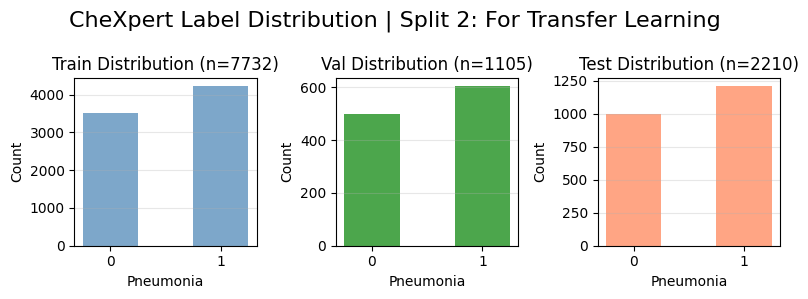

In [41]:
# Invoke split
_, _, _ = df_split_dataset(df0, test_size=0.3, val_size= 0.1, seed=SEED, flag_write=True, base_fn="0_project")

### Split Option 1: Pneumonia - Without Separate Validation Dataset (For MoCo pre-training; Not used for training evaluation)
* Combine Train/Val -> As MoCo pretraining needs as many data samples as possible, and uses the postive/negative pairs instead for learning
* Re-map the labels from -1, 0, 1 to 0 (will aggregate with uncertain), 1

In [42]:
# Function to split DataFrame into train and test sets only
# Stratified on 'Pneumonia' label
def df_split_dataset_method1(df, test_size=0.2, seed=SEED, name=None, flag_remove_lateral=False):
    # Label pre-processing
    # Map -1 to 0
    df['Pneumonia'] = df['Pneumonia'].replace(-1, 0)

    # Only retain "Frontal" cases - what will be used in the classification task
    # Remove any "Lateral" cases
    if flag_remove_lateral:
        if df["Frontal/Lateral"].str.contains("Lateral").any():
            df = df[df["Frontal/Lateral"] == "Frontal"]
            print("Removed 'Lateral' cases. New shape:", df.shape)

    # ---- Train/Test Split Only ----
    train_df, test_df = train_test_split(
        df,
        test_size=test_size,
        random_state=seed,
        shuffle=True,
        stratify=df["Pneumonia"]
    )

    # ---- Save to CSV ----
    if name == "moco":
        train_df.to_csv(f"./dataset_splits/from_part1/1_project_train_{name}.csv", index=False)
        test_df.to_csv(f"./dataset_splits/from_part1/1_project_test_{name}.csv", index=False)
    else:
        train_df.to_csv(f"./dataset_splits/from_part1/2_project_train_{name}.csv", index=False)
        test_df.to_csv(f"./dataset_splits/from_part1/2_project_test_{name}.csv", index=False)

    print("Train:", len(train_df))
    print("Test:", len(test_df))
    print("Total:", len(train_df) + len(test_df))
    print("===============================")

    # ---- Check label distribution ----
    print("\nTrain label distribution:\n", train_df["Pneumonia"].value_counts())
    print("\nTest label distribution:\n", test_df["Pneumonia"].value_counts())
    print("===============================")
    return test_df, train_df

In [43]:
# Invoke split
test_df, train_df = df_split_dataset_method1(final_df, test_size=0.1, seed=SEED, name="moco")

Train: 49500
Test: 5500
Total: 55000

Train label distribution:
 Pneumonia
0    44058
1     5442
Name: count, dtype: int64

Test label distribution:
 Pneumonia
0    4895
1     605
Name: count, dtype: int64


### Split 2: Pneumonia - For Testing MOCO Backbone Pretraining - Linear Classification (Smaller Dataset)
Sample from the negatives chosen above for Split2 (MoCo pretraining)

In [44]:
# Reduce the number of negative pneumonia cases
N_PNEUMONIA_NEGATIVE_SAMPLES_TRAIN = 11200
N_PNEUMONIA_NEGATIVE_SAMPLES_TEST = 2800

In [45]:
# From the df above, sample 0, 1 cases

def sample_from_df(df, N_PNEUMONIA_NEGATIVE_SAMPLES, SEED):
    df_positive = df[df['Pneumonia'] == 1]
    df_negative = df[df['Pneumonia'] == 0]

    df_negative_sampled = df_negative.sample(n=N_PNEUMONIA_NEGATIVE_SAMPLES, random_state=SEED).reset_index(drop=True)
    # Retain all positive samples
    df_balanced = pd.concat([df_positive, df_negative_sampled], ignore_index=True)

    print(df_balanced['Pneumonia'].value_counts())
    return df_balanced

In [46]:
df3_train = sample_from_df(train_df, N_PNEUMONIA_NEGATIVE_SAMPLES_TRAIN, SEED)
df3_test = sample_from_df(test_df, N_PNEUMONIA_NEGATIVE_SAMPLES_TEST, SEED)

Pneumonia
0    11200
1     5442
Name: count, dtype: int64
Pneumonia
0    2800
1     605
Name: count, dtype: int64


In [47]:
df3_train.to_csv(f"./dataset_splits/from_part1/2_project_train_linear_cls.csv", index=False)
df3_test.to_csv(f"./dataset_splits/from_part1/2_project_test_linear_cls.csv", index=False)

In [48]:
print("Train:", len(df3_train))
print("Test:", len(df3_test))
print("Total:", len(df3_train) + len(df3_test))
print("===============================")

# ---- Check label distribution ----
print("\nTrain label distribution:\n", df3_train["Pneumonia"].value_counts())
print("\nTest label distribution:\n", df3_test["Pneumonia"].value_counts())
print("===============================")

Train: 16642
Test: 3405
Total: 20047

Train label distribution:
 Pneumonia
0    11200
1     5442
Name: count, dtype: int64

Test label distribution:
 Pneumonia
0    2800
1     605
Name: count, dtype: int64


---
## MultiClass (14)
### Split 3: Transfer Learning CheXpert: MultiClass

In [49]:
# Get all rows that only have a single label defined (either 0 or 1)
# Discard -1 cases
df_single_label = df[
    (df[label_columns] >= 0).all(axis=1) &     # no -1 values
    (df[label_columns].sum(axis=1) == 1)       # exactly one class is 1
]
print("Shape of single-label-only DataFrame:", df_single_label.shape)

Shape of single-label-only DataFrame: (33427, 19)


In [50]:
df_single_label.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Lateral,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,Frontal,AP,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,Frontal,AP,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [51]:
df_single_label['Frontal/Lateral'].value_counts()

Frontal/Lateral
Frontal    25039
Lateral     8388
Name: count, dtype: int64

In [52]:
# Filter for Frontal only cases
df_single_label_frontal = df_single_label[df_single_label['Frontal/Lateral'] == 'Frontal']
print("Shape after filtering for 'Frontal' only cases:", df_single_label_frontal.shape)

Shape after filtering for 'Frontal' only cases: (25039, 19)


In [53]:
# For each label column, get counts of positive cases
label_one_hot_list = list(label_columns)

positive_counts = df_single_label_frontal[label_one_hot_list].sum()
positive_counts

No Finding                    9474
Enlarged Cardiomediastinum     762
Cardiomegaly                  1034
Lung Opacity                  1815
Lung Lesion                    541
Edema                         2257
Consolidation                  537
Pneumonia                      296
Atelectasis                   1087
Pneumothorax                  2108
Pleural Effusion              2425
Pleural Other                  175
Fracture                      1122
Support Devices               1406
dtype: int64

### Convert One-Hot Encoding to a Single Column

In [54]:
from copy import deepcopy

df_multiclass = deepcopy(df_single_label_frontal)
df_multiclass["Label"] = df_multiclass[label_one_hot_list].apply(lambda r: np.where(r == 1)[0][0] if r.sum() == 1 else -1, axis=1)

df_multiclass.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Label
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,Frontal,AP,0,0,0,0,0,0,0,0,0,1,0,0,0,0,9
10,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,Frontal,AP,0,0,0,0,0,0,0,0,0,1,0,0,0,0,9
11,CheXpert-v1.0-small/train/patient00006/study1/...,Female,42,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# Sort by label mapping
df_multiclass.Label.value_counts().sort_index()

Label
0     9474
1      762
2     1034
3     1815
4      541
5     2257
6      537
7      296
8     1087
9     2108
10    2425
11     175
12    1122
13    1406
Name: count, dtype: int64

Label Mapping

In [56]:
label_map = {col: i for i, col in enumerate(label_one_hot_list)}
label_map

{'No Finding': 0,
 'Enlarged Cardiomediastinum': 1,
 'Cardiomegaly': 2,
 'Lung Opacity': 3,
 'Lung Lesion': 4,
 'Edema': 5,
 'Consolidation': 6,
 'Pneumonia': 7,
 'Atelectasis': 8,
 'Pneumothorax': 9,
 'Pleural Effusion': 10,
 'Pleural Other': 11,
 'Fracture': 12,
 'Support Devices': 13}

### Perform Dataset Splits

Train: 17527
Val: 2504
Test: 5008
Total: 25039

Train label distribution:
 Label
0     6632
10    1697
5     1580
9     1476
3     1270
13     984
12     785
8      761
2      724
1      533
4      379
6      376
7      207
11     123
Name: count, dtype: int64

Val label distribution:
 Label
0     947
10    243
5     226
9     211
3     181
13    141
12    112
8     109
2     103
1      76
4      54
6      54
7      30
11     17
Name: count, dtype: int64

Test label distribution:
 Label
0     1895
10     485
5      451
9      421
3      364
13     281
12     225
8      217
2      207
1      153
4      108
6      107
7       59
11      35
Name: count, dtype: int64


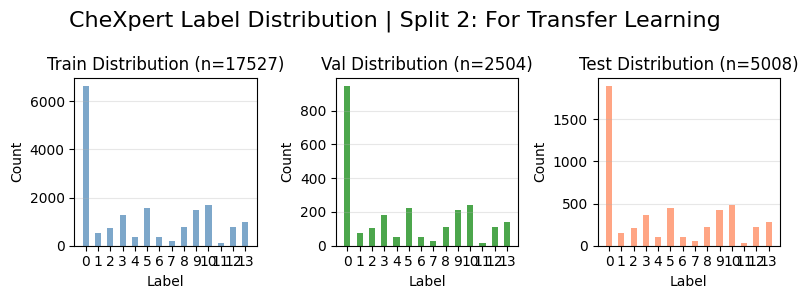

(                                                     Path     Sex  Age  \
 122653  CheXpert-v1.0-small/train/patient29390/study1/...    Male   48   
 1836    CheXpert-v1.0-small/train/patient00447/study1/...    Male   83   
 116534  CheXpert-v1.0-small/train/patient27952/study1/...    Male   85   
 207180  CheXpert-v1.0-small/train/patient53349/study4/...  Female   60   
 123877  CheXpert-v1.0-small/train/patient29673/study1/...    Male   76   
 ...                                                   ...     ...  ...   
 138582  CheXpert-v1.0-small/train/patient33276/study1/...    Male   73   
 132271  CheXpert-v1.0-small/train/patient31711/study4/...    Male   85   
 58787   CheXpert-v1.0-small/train/patient14232/study1/...    Male   40   
 176349  CheXpert-v1.0-small/train/patient41282/study3/...    Male   80   
 124597  CheXpert-v1.0-small/train/patient29826/study1/...    Male   63   
 
        Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  \
 122653         Frontal  

In [57]:
df_split_dataset(df_multiclass, test_size=0.3, val_size= 0.1, seed=SEED, flag_write=True, base_fn="3_project", label_col="Label")